# Applying Linear Regression and Random Forests to Predict Air Quality: A Data Mining Study

# Introduction

Air quality is a critical global concern

This study applies two data mining techniques to predict carbon monoxide (CO) concentration using the UCI Air Quality Data Set.

Linear Regression models linear relationships between features and CO levels.

Decision Trees split data based on features, while Random Forests ensemble multiple trees for robustness. The goal is to compare these subtopics.

### 1. Import Libraries
Import the required libraries for data handling, preprocessing, modeling, and visualization.

In [70]:
# Import all required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

### 2. Data Loading and Preprocessing
Load the Air Quality dataset, handle missing values, standardize features, and split into training and testing sets.

In [71]:
# Load dataset (downloaded from https://archive.ics.uci.edu/dataset/360/air+quality)
data = pd.read_csv('AirQualityUCI.csv')
data = data.drop(['Date', 'Time'], axis=1)  # Drop non-numeric columns

In [72]:
# Handle missing values (-200 as mentioned in the "Additional Information" section on https://archive.ics.uci.edu/dataset/360/air+quality)
data = data.replace(-200, data.replace(-200, None).mean())

In [73]:
# Impute missing values using the mean
# Create an imputer object with the mean strategy
imputer = SimpleImputer(strategy='mean')
# Impute missing values
data_imputed = imputer.fit_transform(data)

# Selecting columns without all NaN values
imputed_columns = data.columns[~data.isnull().all()]

# Assign back to data with correct columns
data = pd.DataFrame(data_imputed, columns=imputed_columns)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 15' 'Unnamed: 16']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [74]:
# Define features and target
X = data.drop('CO(GT)', axis=1)  # Dropping CO(GT) column which we want to predict
y = data['CO(GT)']  # Pandas series containing only CO(GT)

In [75]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("After scaling, NaN count in X_scaled:", pd.isna(X_scaled).sum())

After scaling, NaN count in X_scaled: 0


In [76]:
# Ensure no NaNs in y
y = y.fillna(y.mean())  # Fill any NaNs in target (unlikely, but safe)
print("NaN count in y:", y.isna().sum())

NaN count in y: 0


In [77]:
# Split the data into training and testing sets.
# 80% of the data will be used for training and 20% for testing.
# random_state ensures consistent splitting for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 3. Model Training and Evaluation
Train three models: Linear Regression (Subtopic 1), Decision Tree, and Random Forest (Subtopic 2). Evaluate their performance using MSE and R².

In [78]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

In [79]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)


In [80]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

### 4. Print Performance Metrics
Display the MSE and R² scores for all three models to compare their performance.

In [81]:
# Results
print("Linear Regression - MSE:", lr_mse, "R²:", lr_r2)
print("Random Forest - MSE:", rf_mse, "R²:", rf_r2)
print("Decision Tree - MSE:", dt_mse, "R²:", dt_r2)

Linear Regression - MSE: 0.33347524920671306 R²: 0.8112999326647208
Random Forest - MSE: 0.28483705695453004 R²: 0.8388223055391285
Decision Tree - MSE: 0.5676444008751634 R²: 0.6787931430520053


### 5. Scatter Plot: Predicted vs. Actual CO(GT)
Generate scatter plots to compare the predicted vs. actual CO(GT) values for Linear Regression, Decision Tree, and Random Forest.

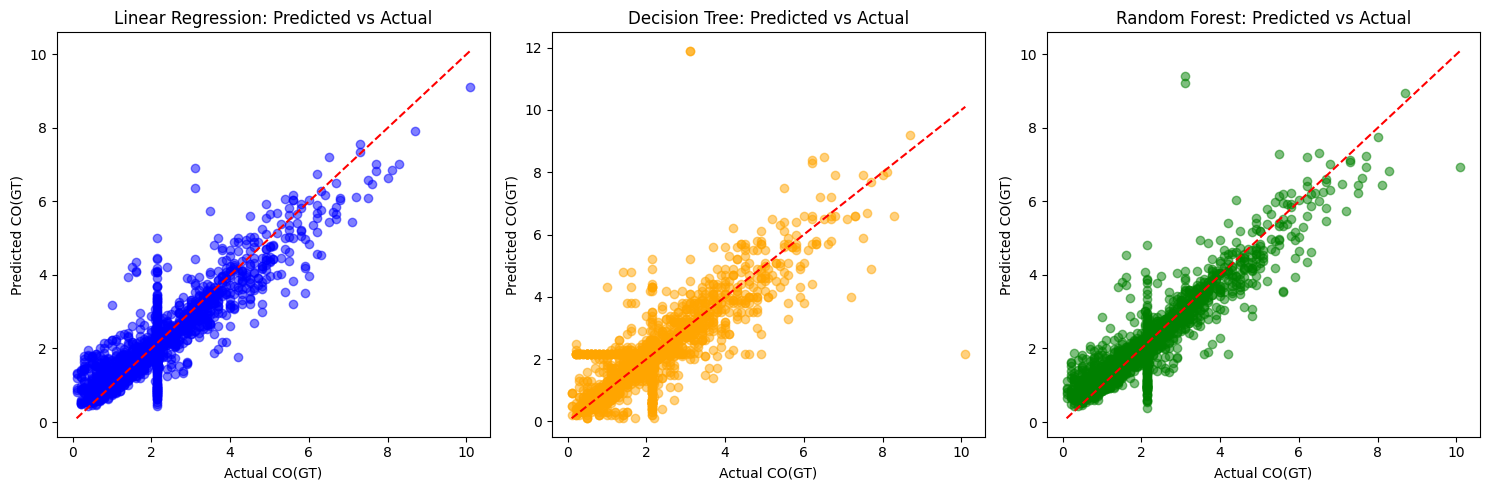

In [82]:
# Graph 1: Scatter Plot - Predicted vs Actual
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual CO(GT)')
plt.ylabel('Predicted CO(GT)')

plt.subplot(1, 3, 2)
plt.scatter(y_test, dt_pred, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Decision Tree: Predicted vs Actual')
plt.xlabel('Actual CO(GT)')
plt.ylabel('Predicted CO(GT)')

plt.subplot(1, 3, 3)
plt.scatter(y_test, rf_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual CO(GT)')
plt.ylabel('Predicted CO(GT)')

plt.tight_layout()
plt.savefig('predicted_vs_actual.png')
plt.show()

### 6. Bar Chart: Model Performance Comparison
Generate a bar chart to compare the MSE and R² scores of Linear Regression, Decision Tree, and Random Forest.

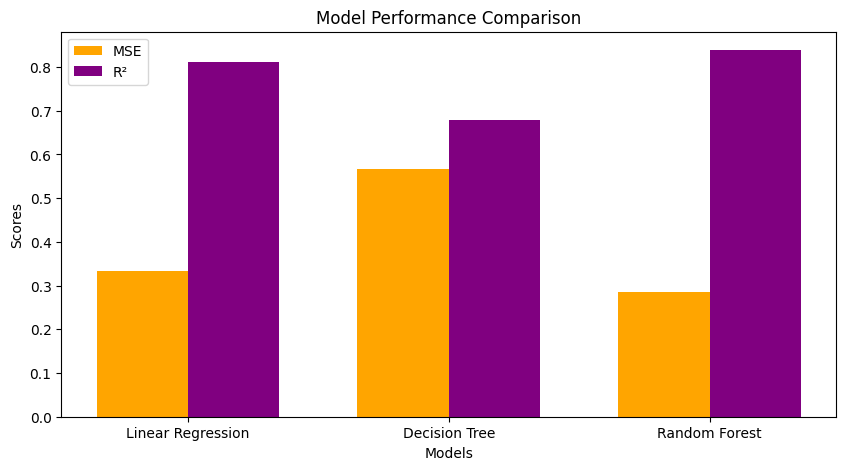

In [83]:
# Graph 2: Bar Chart - Model Performance
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [lr_mse, dt_mse, rf_mse]
r2_values = [lr_r2, dt_r2, rf_r2]

plt.figure(figsize=(10, 5))
bar_width = 0.35
x = range(len(models))

plt.bar(x, mse_values, bar_width, label='MSE', color='orange')
plt.bar([i + bar_width for i in x], r2_values, bar_width, label='R²', color='purple')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([i + bar_width/2 for i in x], models)
plt.legend()
plt.savefig('model_performance.png')
plt.show()